In [1]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [2]:
import pandas as pd


In [3]:
churn_data = pd.read_csv('Churn_Modelling.csv')

In [4]:
churn_data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Firstly we are going to solve the Classification Problems.

In [5]:
## Divide the dataset into independent and dependent features

X=churn_data.iloc[:,3:13]
y=churn_data.iloc[:,13]

In [6]:
# Encoding the categorical values into numerical values
geography = pd.get_dummies(X['Geography'], drop_first = True)
gender = pd.get_dummies(X['Gender'], drop_first=True)


In [7]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [8]:
X = X.drop(['Geography', 'Gender'], axis= 1)

In [9]:
X.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [10]:
# Appending the new encoded values into the dataframe
X = pd.concat([X, geography, gender], axis = 1)

In [11]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [12]:
# Splitting the data into train and test split

from sklearn.model_selection import train_test_split

In [13]:
X_train , X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [14]:
# Feature scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [15]:
X_train

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [16]:
X_test

array([[-0.57749609, -0.6557859 , -0.69539349, ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.29729735,  0.3900109 , -1.38944225, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.52560743,  0.48508334, -0.3483691 , ..., -0.57946723,
         1.73494238, -1.09499335],
       ...,
       [ 0.81311987,  0.77030065,  0.69270405, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.41876609, -0.94100321, -0.3483691 , ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.24540869,  0.00972116, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [17]:
## Part 2 Now lets create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [18]:
###Initialize the ANN
classifier = Sequential()

In [19]:
classifier

In [20]:
# Adding the input layer and first hidden layer
classifier.add(Dense(10, input_shape = (11, ), activation = 'relu'))

In [21]:
#adding the first hidden layer
classifier

In [22]:
#adding the second hidden layer
classifier.add(Dense(units=10, activation = 'relu'))
#classifier.add(Dropout(0.2))

In [23]:
# adding the third hidden layer
classifier.add(Dense(units=10, activation = 'relu'))
#classifier.add(Dropout(0.3))

In [24]:
#adding the output layer
classifier.add(Dense(1, activation = 'sigmoid'))

In [25]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 351 (1.37 KB)
Trainable params: 351 (1.37 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In summary, only hidden layer and output layer is shown

params means -> total number of weights and bias

In [26]:
# In order to consider the optimizers
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [27]:
# In compile, we are iniliazing the hyperparameter
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

Early stopping means- while the loss function are decreasing, once we start getting the loss function almost negligible difference, even though the epoch haven't been completed, We stopped over it.
That's called as Early stopping.

In [28]:
## early stopping

import tensorflow as tf

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5
)

In [29]:
### Starting the training

model_history = classifier.fit(
    X_train, Y_train,
    batch_size=10,
    epochs=100,
    validation_data=(X_test, Y_test),  # Include validation data
    callbacks=[early_stopping]
)


Epoch 1/100
800/800 [==============================] - 6s 4ms/step - loss: 0.4007 - accuracy: 0.8331 - val_loss: 0.3635 - val_accuracy: 0.8535
Epoch 2/100
800/800 [==============================] - 4s 5ms/step - loss: 0.3619 - accuracy: 0.8529 - val_loss: 0.3512 - val_accuracy: 0.8560
Epoch 3/100
800/800 [==============================] - 5s 7ms/step - loss: 0.3569 - accuracy: 0.8558 - val_loss: 0.3554 - val_accuracy: 0.8580
Epoch 4/100
800/800 [==============================] - 6s 8ms/step - loss: 0.3526 - accuracy: 0.8566 - val_loss: 0.3494 - val_accuracy: 0.8595
Epoch 5/100
800/800 [==============================] - 7s 8ms/step - loss: 0.3490 - accuracy: 0.8580 - val_loss: 0.3440 - val_accuracy: 0.8535
Epoch 6/100
800/800 [==============================] - 5s 7ms/step - loss: 0.3456 - accuracy: 0.8550 - val_loss: 0.3477 - val_accuracy: 0.8505
Epoch 7/100
800/800 [==============================] - 3s 4ms/step - loss: 0.3473 - accuracy: 0.8568 - val_loss: 0.3571 - val_accuracy: 0.8525

In [30]:
### Starting the training

model_history1 = classifier.fit(X_train, Y_train, validation_split= 0.33, batch_size=10, epochs=100, callbacks=early_stopping)

Epoch 1/100
536/536 [==============================] - 3s 4ms/step - loss: 0.3326 - accuracy: 0.8643 - val_loss: 0.3468 - val_accuracy: 0.8512
Epoch 2/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3287 - accuracy: 0.8670 - val_loss: 0.3509 - val_accuracy: 0.8527
Epoch 3/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3306 - accuracy: 0.8642 - val_loss: 0.3514 - val_accuracy: 0.8493
Epoch 4/100
536/536 [==============================] - 3s 6ms/step - loss: 0.3282 - accuracy: 0.8658 - val_loss: 0.3540 - val_accuracy: 0.8474
Epoch 5/100
536/536 [==============================] - 3s 5ms/step - loss: 0.3280 - accuracy: 0.8658 - val_loss: 0.3479 - val_accuracy: 0.8554
Epoch 6/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3293 - accuracy: 0.8645 - val_loss: 0.3553 - val_accuracy: 0.8489


In [31]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [32]:
model_history1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [34]:
import matplotlib.pyplot as plt

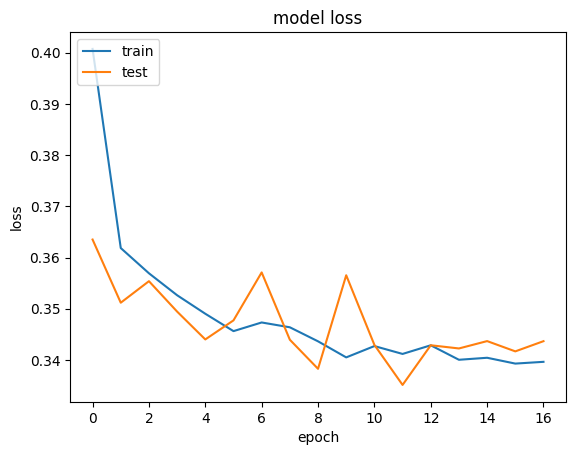

In [35]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

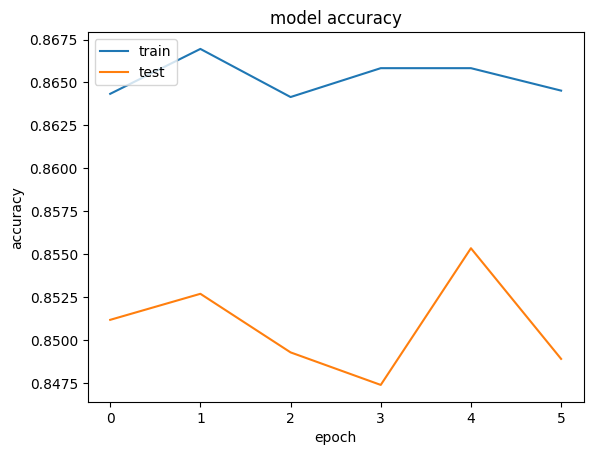

In [36]:
import matplotlib.pyplot as plt


plt.plot(model_history1.history['accuracy'])
plt.plot(model_history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

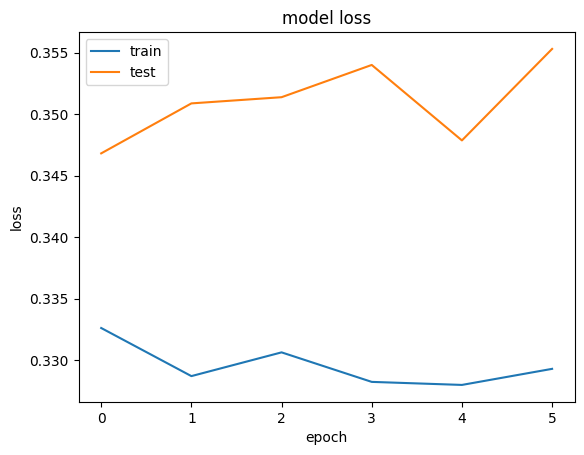

In [37]:

# summarize history for loss
plt.plot(model_history1.history['loss'])
plt.plot(model_history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [38]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 2ms/step


In [39]:
## make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_pred)
cm

array([[1524,   83],
       [ 196,  197]])

In [40]:
## Calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,Y_test)

In [41]:
score

0.8605

In [42]:
##get the weights
classifier.get_weights()

[array([[-0.16524647, -0.3884586 , -0.37920356, -0.5124284 , -0.19844812,
          0.33737266, -0.26572883,  0.37573737, -0.12613097,  0.9082638 ],
        [ 2.272279  , -1.1748946 , -1.6109413 ,  0.4052538 , -0.31708926,
         -2.4048965 , -1.1187845 ,  1.6056032 ,  2.623885  , -0.06006997],
        [ 0.14033628, -0.81418025, -0.07905319,  0.9490409 ,  0.05456122,
         -0.28648362,  0.05659381, -0.42663908, -0.16537185, -0.3149515 ],
        [-0.9267032 ,  0.34893104, -0.84375656,  1.1763029 , -3.3998363 ,
         -0.36087298,  0.334663  ,  0.56258965, -0.37983456, -1.8411659 ],
        [-0.08662055,  3.2727764 , -0.5085788 ,  1.9288888 , -0.34926242,
          0.6360662 ,  1.3378674 ,  2.8909125 , -2.4317338 , -0.32143214],
        [ 0.07758476, -0.4699875 , -0.22453648, -0.5378606 , -0.10447625,
         -0.31869802,  0.58342904, -0.22262886, -0.2889493 , -0.8464727 ],
        [ 1.8069934 , -0.18288922,  0.45696062, -1.3583628 ,  0.10946589,
         -0.65058225,  1.68463  

In [43]:
## Saving h5 file
#its like the model pixel
classifier.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [44]:
##laoding h5 file
from tensorflow import keras
classifier1=keras.models.load_model('model.h5')

In [45]:
classifier1.predict(X_test)

63/63 [==============================] - 0s 1ms/step


array([[0.047874  ],
       [0.01328548],
       [0.02862699],
       ...,
       [0.6858288 ],
       [0.11585039],
       [0.34006122]], dtype=float32)

In [46]:
####################################### REGRESSION ##############################################

In [47]:
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [48]:
X=churn_data[['CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember','Exited']]
y=churn_data.iloc[:,12]

In [49]:
## Feature Engineering
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [50]:
## concatenate these variables with dataframe
X=X.drop(['Geography','Gender'],axis=1)
X=pd.concat([X,geography,gender],axis=1)

In [51]:
#Splitting the dataset into Training set and Test Set
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [52]:
#feature Scaling

from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [53]:
### Lets initialize the ANN
regressor=Sequential()
## Adding the input Layer and first hidden layer
regressor.add(Dense(10,input_shape=(11,),activation='relu'))

In [54]:
# adding the second hidden layer
regressor.add(Dense(units=10,activation='relu'))
#regressor.add(Dropout(0.2))

In [55]:
##adding the third hidden layer
regressor.add(Dense(units=10,activation='relu'))
#regressor.add(Dropout(0.3))

In [56]:
##  Adding the output layer
regressor.add(Dense(1))

In [57]:
regressor

In [58]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                120       
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
 dense_6 (Dense)             (None, 10)                110       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 351 (1.37 KB)
Trainable params: 351 (1.37 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [65]:
mse=tf.keras.losses.MeanSquaredError(
    name='mean_squared_error'
)
metrics=tf.keras.metrics.MeanSquaredError(
    name='mean_squared_error', dtype=None
)

In [73]:
# In order to consider the optimizers
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [81]:
regressor.compile(optimizer=opt,loss=mse,metrics=['mae'])

In [82]:
## Early Stopping
import tensorflow as tf
early_stopping= tf.keras.callbacks.EarlyStopping(
    monitor='mae',
    patience=20

)

In [83]:
model_history = regressor.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=10,epochs=100,callbacks=early_stopping)

Epoch 1/100
800/800 [==============================] - 3s 3ms/step - loss: 3282742272.0000 - mae: 49354.6992 - val_loss: 3363789824.0000 - val_mae: 50146.9570
Epoch 2/100
800/800 [==============================] - 2s 3ms/step - loss: 3276864768.0000 - mae: 49313.4805 - val_loss: 3367278592.0000 - val_mae: 50112.9922
Epoch 3/100
800/800 [==============================] - 2s 3ms/step - loss: 3281510656.0000 - mae: 49309.6953 - val_loss: 3371642112.0000 - val_mae: 50172.9531
Epoch 4/100
800/800 [==============================] - 3s 3ms/step - loss: 3279752960.0000 - mae: 49331.0898 - val_loss: 3377375744.0000 - val_mae: 50217.9688
Epoch 5/100
800/800 [==============================] - 3s 4ms/step - loss: 3280817408.0000 - mae: 49331.2656 - val_loss: 3360606976.0000 - val_mae: 50140.4531
Epoch 6/100
800/800 [==============================] - 3s 3ms/step - loss: 3281268736.0000 - mae: 49323.5977 - val_loss: 3342510592.0000 - val_mae: 49995.4844
Epoch 7/100
800/800 [=========================

In [84]:
y_pred=regressor.predict(X_test)

63/63 [==============================] - 0s 1ms/step


In [85]:
y_pred

array([[ 97447.01],
       [ 99534.54],
       [ 93070.23],
       ...,
       [100767.88],
       [ 95792.76],
       [ 88799.59]], dtype=float32)

In [86]:
from sklearn.metrics import r2_score

In [87]:
print(r2_score(y_test,y_pred))

-0.01476250742131624
